# Smoothed Residuals for Poisson Image Data

This notebook considers the case of computing smoothed residuals for Poisson image data. The goal is to preserve the variance while smoothing by applying the correct rescaling factor. 

The formula is given by:

$$\rho(\mathbf{D}, \boldsymbol{\lambda}) \approx 2\sqrt{\pi \sigma^2}\frac{(\mathbf{D} - \boldsymbol{\lambda}) \circledast g_{\sigma}} {\sqrt{\boldsymbol{\lambda}\circledast g_{\sigma}}},$$


where $\mathbf{D}$ is the measured counts image, $\boldsymbol{\lambda}$ is the expected counts image,  and $g_{\sigma}$ is a Gaussian smoothing kernel (normalized to integrate to unity)

For illustration we apply this to a very simple image model of constant emission and Poisson noise:

In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy import stats
import matplotlib.pyplot as plt

random_state = np.random.RandomState(4837)

In [2]:
npred = 10 * np.ones((256, 256))
counts = random_state.poisson(npred)

def compute_smoothed_residuals(counts, npred, sigma):
    """Compute smoothed residuals."""
    top = gaussian_filter(counts - npred, sigma)
    bottom = np.sqrt(gaussian_filter(npred, sigma))
    return 2 *  np.sqrt(np.pi * sigma ** 2) * top / bottom

def plot_residuals(ax_image, ax_hist, residuals, sigma):
    ax_image.imshow(residuals, cmap='RdBu', vmin=-5, vmax=5)
    ax_image.text(150, 20, f"Sigma={sigma}", fontsize=14, fontweight="bold")

    ax_hist.hist(residuals.flatten(), bins=50, density=True, alpha=0.5);
    ax_hist.set_xlim(-5, 5)

    x = np.linspace(-5, 5, 100)
    y = stats.norm.pdf(x)
    ax_hist.plot(x, y, color='black', linestyle='--', label="Unit Gaussian")
    ax_hist.text(-4, 0.3, f"Mean: {residuals.mean():.2f}\nStd: {residuals.std():.2f}",)
    ax_hist.legend()

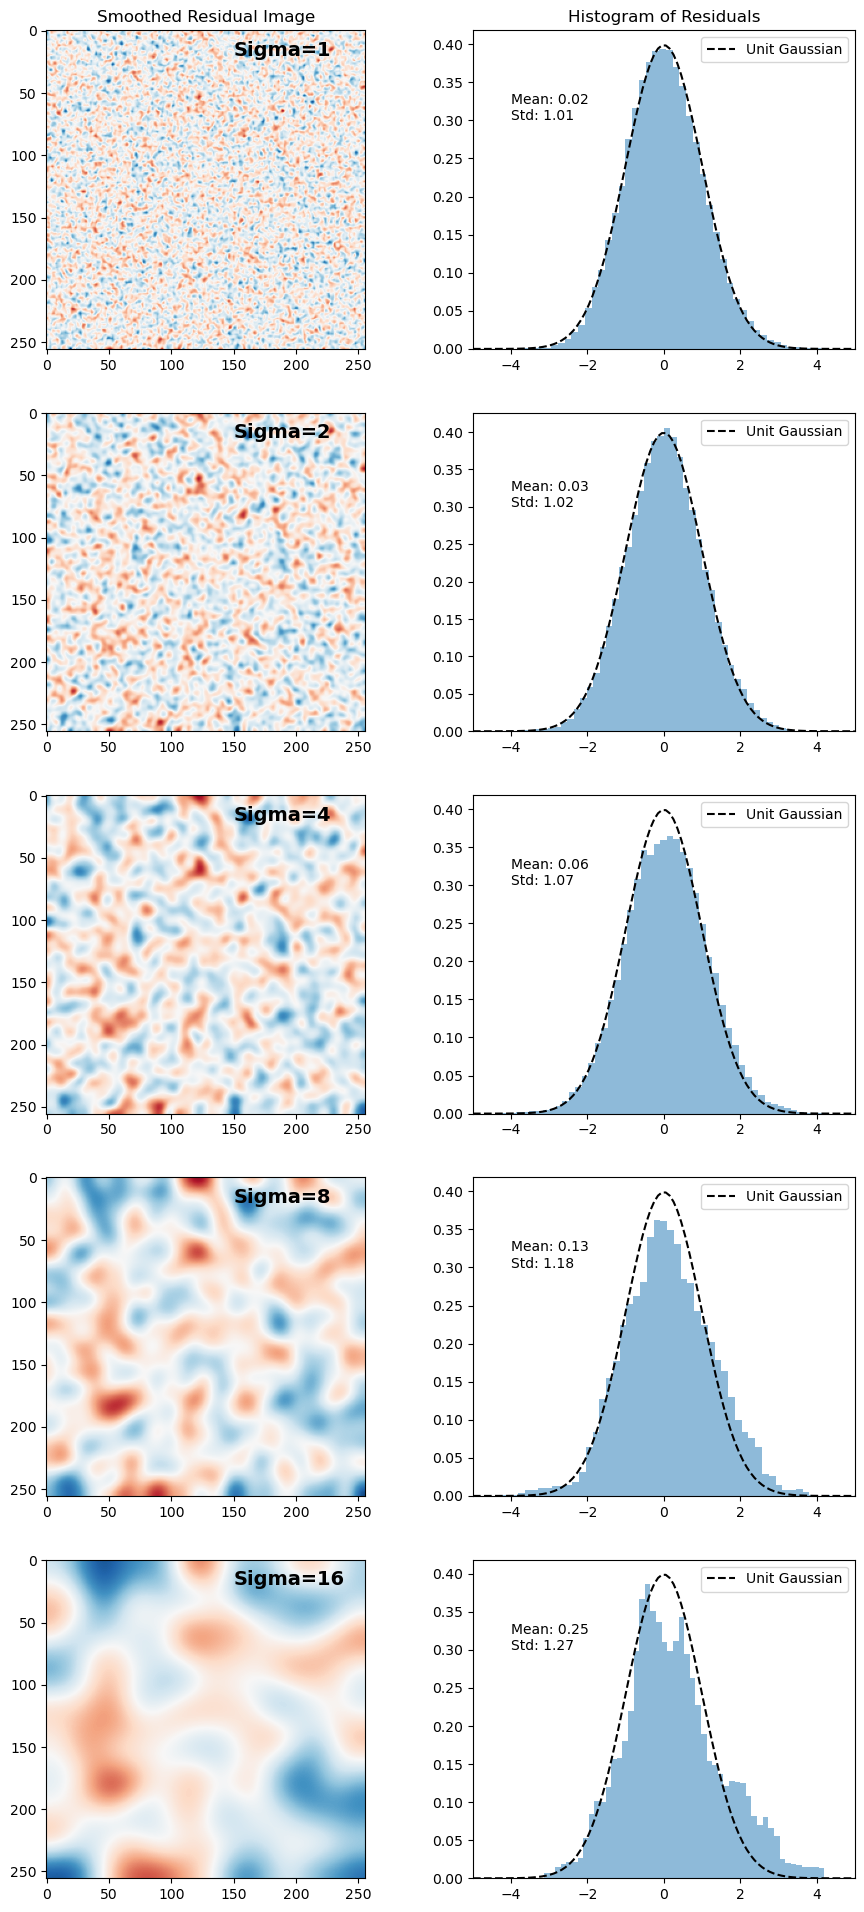

In [3]:
fig, axes = plt.subplots(5, 2, figsize=(12, 24), gridspec_kw={"left": 0.2})

for idx, sigma in enumerate([1, 2, 4, 8, 16]):
    residuals = compute_smoothed_residuals(counts, npred, sigma)

    ax_image, ax_hist = axes[idx]

    if idx == 0:
        ax_image.set_title('Smoothed Residual Image')
        ax_hist.set_title('Histogram of Residuals')
    
    plot_residuals(ax_image, ax_hist, residuals, sigma=sigma);


For large smoothing scales the distribution looses its Gaussian shape, however the approximation seems good enough.